In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/signi/Downloads/income.csv')

In [3]:
data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0
48838,64,321403,9,0,0,40,0
48839,38,374983,13,0,0,50,0
48840,44,83891,13,5455,0,40,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education_num   48842 non-null  int64
 3   capital_gain    48842 non-null  int64
 4   capital_loss    48842 non-null  int64
 5   hours_per_week  48842 non-null  int64
 6   income_level    48842 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
data.isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
income_level      0
dtype: int64

In [7]:
data.nunique()

age                  74
fnlwgt            28523
education_num        16
capital_gain        123
capital_loss         99
hours_per_week       96
income_level          2
dtype: int64

<AxesSubplot:>

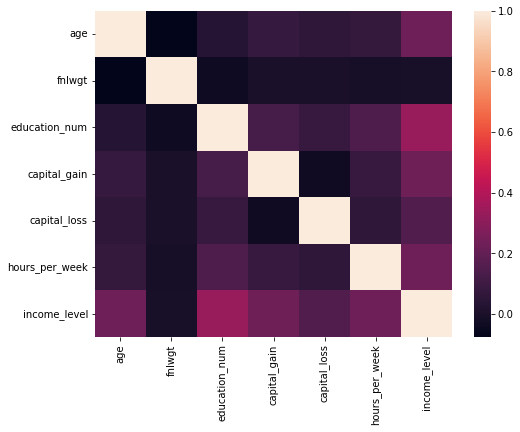

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr())

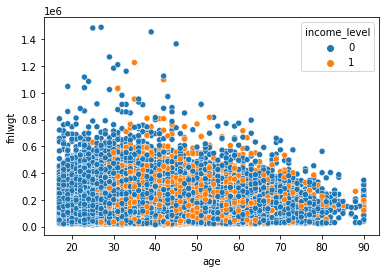

In [10]:
sns.scatterplot(x="age", y="fnlwgt", data=data,hue = 'income_level');

In [11]:
data.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')

In [12]:
features = ['age', 'education_num', 'capital_gain', 'capital_loss','hours_per_week', 'income_level']
response = ["fnlwgt"]
X=data[features].values
y=data[response].values

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
model = LinearRegression()

In [24]:
model = model.fit(X_train,y_train)

In [25]:
print(model.coef_)
print(model.intercept_)

[[-6.07560656e+02 -1.91641258e+03  7.20982533e-02  1.73538122e+00
  -9.16026643e+01  6.57285349e+03]]
[233981.80784325]


In [18]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     44.80
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           6.57e-55
Time:                        16:09:22   Log-Likelihood:            -4.4369e+05
No. Observations:               34189   AIC:                         8.874e+05
Df Residuals:                   34182   BIC:                         8.875e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.34e+05   3306.138     70.772      0.000    2.28e+05     2.4e+05
x1          -607.5607     42.549    -14.279      0.000    -690.958    -524.163
x2         -1916.4126    235.433     -8.140      0.000   -2377.868   -1454.957
x3             0.0721      0.078      0.922      0.356      -0.081       0.225
x4             1.7354      1.430      1.214      0.225      -1.067       4.538
x5           -91.6027     46.770     -1.959      0.050    -183.274       0.069
x6          6572.8535   1503.983      4.370      0.000    3624.996    9520.711
==============================================================================
Omnibus:                    10675.722   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58589.021
Skew:                           1.399   Prob(JB):                         0.00
Kurtosis:                       8.770   Cond. No.                     4.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
y_pred = model.predict(X_train)

In [27]:
y_predict = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_train, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_train, y_pred)))
print('R^2: %.2f' % r2_score(y_train, y_pred))

MSE: 10960270771.00
RMSE: 104691.31
R^2: 0.01


In [29]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_test, y_predict))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_predict)))
print('R^2: %.2f' % r2_score(y_test, y_predict))

MSE: 11308383736.76
RMSE: 106340.88
R^2: 0.01


## Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_strain = sc_X.fit_transform(X_train)
X_stest = sc_X.transform(X_test)
sc_y = StandardScaler()
y_strain = sc_y.fit_transform(y_train)
y_stest = sc_y.transform(y_test)

In [31]:
#using sklearn method
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_strain,y_strain)
print(model.coef_)
print(model.intercept_)

[[-0.07919845 -0.04683198  0.0051193   0.00662741 -0.01087852  0.02674065]]
[-1.4478022e-16]


In [32]:
y_pred = model.predict(X_strain)

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_strain, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_strain, y_pred)))
print('R^2: %.2f' % r2_score(y_strain, y_pred))

MSE: 0.99
RMSE: 1.00
R^2: 0.01


In [34]:
test_predict = model.predict(X_stest)
test_actual = y_stest

In [35]:
print('MSE: %.2f' % mean_squared_error(test_actual, test_predict))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(test_actual, test_predict)))
print('R^2: %.2f' % r2_score(test_actual, test_predict))

MSE: 1.02
RMSE: 1.01
R^2: 0.01


## Normalization

In [36]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
sc_X = MinMaxScaler()
X_ntrain = sc_X.fit_transform(X_train)
X_ntest = sc_X.transform(X_test)
sc_y = MinMaxScaler()
y_ntrain = sc_y.fit_transform(y_train)
y_ntest = sc_y.transform(y_test)

In [37]:
#using sklearn method
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_ntrain,y_ntrain)
print(reg.coef_)
print(reg.intercept_)

[[-0.03000574 -0.01944787  0.00487767  0.00511416 -0.00607332  0.00444678]]
[0.14164004]


In [38]:
y_pred = reg.predict(X_ntrain)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_ntrain, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_ntrain, y_pred)))
print('R^2: %.2f' % r2_score(y_ntrain, y_pred))

MSE: 0.01
RMSE: 0.07
R^2: 0.01


In [40]:
y_predict = reg.predict(X_ntest)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_ntest, y_predict))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_ntest, y_predict)))
print('R^2: %.2f' % r2_score(y_ntest, y_predict))

MSE: 0.01
RMSE: 0.07
R^2: 0.01


## Lasso

In [42]:
# Using Lasso (L1 Regularized) Regression Model
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_train)

In [43]:
print('MSE :  ',mean_squared_error(y_train,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_pred)))
print('R2  : ',r2_score(y_train, y_pred))

MSE :   10960290902.315664
RMSE:  104691.40796796871
R2  :  0.007800224982831061


In [44]:
y_predict = lasso_reg.predict(X_test)

In [45]:
print('MSE :  ',mean_squared_error(y_test,y_predict))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('R2  :  ',r2_score(y_test, y_predict))

MSE :   11308540912.361326
RMSE:   106341.6236116476
R2  :   0.007771732339912019


## Ridge

In [46]:
# Using Ridge (L2 Regularized) Regression Model
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_train)

In [47]:
print('MSE :  ',mean_squared_error(y_train,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_pred)))
print('R2  : ',r2_score(y_train, y_pred))

MSE :   10960271429.048805
RMSE:  104691.31496475152
R2  :  0.00780198783485464


In [48]:
y_predict = ridge_reg.predict(X_test)

In [49]:
print('MSE :  ',mean_squared_error(y_test,y_predict))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('R2  :  ',r2_score(y_test, y_predict))

MSE :   11308414056.462563
RMSE:   106341.0271553861
R2  :   0.00778286286591412


## Polynomial

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [52]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree = 2) 
X_polynom = polynom.fit_transform(X_train) 
  
X_polynom

array([[1.000e+00, 4.300e+01, 1.000e+01, ..., 1.600e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.100e+01, 9.000e+00, ..., 1.600e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.200e+01, 1.000e+01, ..., 1.600e+03, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 4.100e+01, 1.000e+01, ..., 3.600e+03, 6.000e+01,
        1.000e+00],
       [1.000e+00, 4.700e+01, 1.300e+01, ..., 1.600e+03, 4.000e+01,
        1.000e+00],
       [1.000e+00, 2.500e+01, 1.000e+01, ..., 2.304e+03, 0.000e+00,
        0.000e+00]])

In [53]:
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y_train) 

LinearRegression()

In [54]:
y_predict_slr = LinReg.predict(X_train)

from sklearn import metrics
print(mean_squared_error(y_train,y_predict_slr))
print(np.sqrt(mean_squared_error(y_train,y_predict_slr)))
print(r2_score(y_train,y_predict_slr))

10960270770.995852
104691.31182192652
0.007802047406265555


In [55]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square of Polynomial Regression is:', r_square)

R-Square of Polynomial Regression is: 0.011051313583957945


In [56]:
print('MSE :  ',mean_squared_error(y_test,y_predict_pr))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,y_predict_pr)))
print('R2  :  ',r2_score(y_test,y_predict_pr))

MSE :   11271163143.673918
RMSE:   106165.73431985444
R2  :   0.011051313583957945


## Logestic Regression

In [60]:
data = pd.read_csv('C:/Users/signi/Downloads/income.csv')

In [61]:
data.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')

In [62]:
features = ['age','fnlwgt','education_num', 'capital_gain', 'capital_loss','hours_per_week']
response = ["income_level"]
X=data[features].values
y=data[response].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)
ytrain_pred = logmodel.predict(X_train)
print('Train roc - auc: {}'.format(roc_auc_score(y_train,ytrain_pred)))
#Predict the value for new, unseen data
ytest_pred = logmodel.predict(X_test)
print('Test roc - auc: {}'.format(roc_auc_score(y_test,ytest_pred)))
# pred

Train roc - auc: 0.6117807096979949
Test roc - auc: 0.6117237586138888


C:\Users\signi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     26109
           1       0.71      0.26      0.38      8080

    accuracy                           0.80     34189
   macro avg       0.76      0.61      0.63     34189
weighted avg       0.79      0.80      0.76     34189



In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11046
           1       0.73      0.25      0.38      3607

    accuracy                           0.79     14653
   macro avg       0.76      0.61      0.63     14653
weighted avg       0.78      0.79      0.75     14653



In [72]:
#Generate confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,ytest_pred)
conf_mat

array([[10706,   340],
       [ 2690,   917]], dtype=int64)

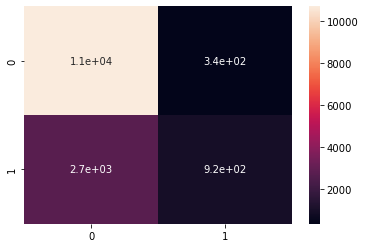

In [73]:
import seaborn as sn
conf_mat = confusion_matrix(y_test,ytest_pred)
sn.heatmap(conf_mat, annot=True)
plt.show()

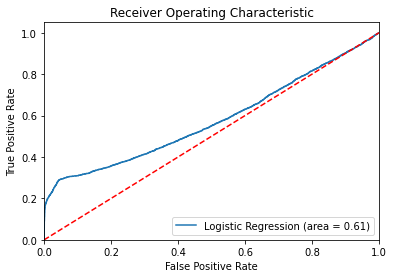

In [74]:
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [75]:
    pred = []
    for model in [logmodel]:
        pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    final_prediction = pd.concat(pred,axis=1).mean(axis=1)
    print('Test roc auc:{}'.format(roc_auc_score(y_test,final_prediction)))

Test roc auc:0.5787234681231461


In [77]:
False_pos_rate, True_pos_rate, threshold = roc_curve(y_test, final_prediction)
threshold

array([2.        , 1.        , 1.        , ..., 0.01221219, 0.00558165,
       0.0025437 ])

In [78]:
from sklearn.metrics import accuracy_score

acc = []

for thres in threshold:
    y_pred = np.where(final_prediction>thres,1,0)
    acc.append(accuracy_score(y_test,y_pred,normalize=True))
acc = pd.concat([pd.Series(threshold), pd.Series(acc)], axis=1)
acc.columns = ['threshold','accuracy']
acc.sort_values(by="accuracy", ascending=False, inplace = True)
acc.head()


,threshold,accuracy
149,0.619471,0.795264
151,0.617682,0.795127
159,0.610818,0.795127
153,0.616233,0.795127
150,0.618520,0.795127


In [80]:
first_val = acc['threshold'].iat[0]
first_val

0.6194707029651352

In [81]:
#creating model with the best threshold value

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

THRESHOLD = first_val
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), roc_auc_score(y_test, preds)], index=["accuracy", "recall", "precision", "roc_auc_score"])

C:\Users\signi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
accuracy,0.784959
recall,0.308844
precision,0.628668
roc_auc_score,0.624637


## Model best fits with the threshold of 0.6194

In [82]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     11046
           1       0.63      0.31      0.41      3607

    accuracy                           0.78     14653
   macro avg       0.72      0.62      0.64     14653
weighted avg       0.76      0.78      0.76     14653



## Decision Tree

In [114]:
data = pd.read_csv('C:/Users/signi/Downloads/income.csv')

In [115]:
features = ['age','fnlwgt','education_num', 'capital_gain', 'capital_loss','hours_per_week']
response = ["income_level"]
X=data[features].values
y=data[response].values

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [117]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [118]:
dtree = tree.DecisionTreeClassifier( max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [119]:
y_pred = dtree.predict(X_train)

In [120]:
accuracy = metrics.accuracy_score(y_train, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.81


In [121]:
y_predict = dtree.predict(X_test)

In [122]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.80


In [123]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[11016    30]
 [ 2920   687]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     11046
           1       0.96      0.19      0.32      3607

    accuracy                           0.80     14653
   macro avg       0.87      0.59      0.60     14653
weighted avg       0.83      0.80      0.74     14653



In [127]:
L1 = []
L2 = []
val_range = [2,5,10,15,20,30,50,100]

for i in val_range:
    dtree = tree.DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_train)
    y_predict = dtree.predict(X_test)
    L1.append(round(accuracy_score(y_train,y_pred),4))
    L2.append(round(accuracy_score(y_test,y_predict),4))
L_val = pd.concat([pd.Series(val_range),pd.Series(L1)], axis=1)
L1_val = pd.concat([pd.Series(val_range),pd.Series(L2)], axis=1)
L_val.columns = ['Depth','Accuracy']
L1_val.columns = ['Depth','Accuracy']
print(L_val)
print('------------------------')
print(L1_val)

   Depth  Accuracy
0      2    0.8054
1      5    0.8338
2     10    0.8469
3     15    0.8709
4     20    0.9089
5     30    0.9706
6     50    0.9987
7    100    0.9989
------------------------
   Depth  Accuracy
0      2    0.7987
1      5    0.8287
2     10    0.8318
3     15    0.8202
4     20    0.8029
5     30    0.7861
6     50    0.7742
7    100    0.7757


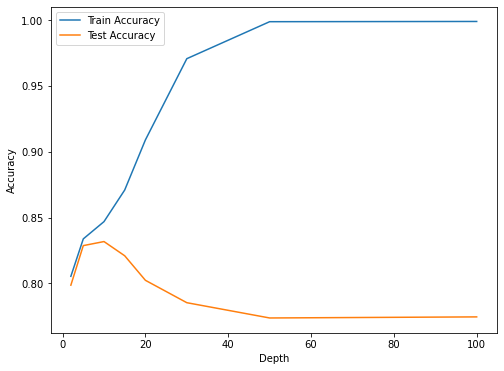

In [125]:

max_depth_list = [2,5,10,15,20,30,50,100]

train = [] # Log training errors for each model
test = [] # Log testing errors for each model

for x in max_depth_list:
    dtree = tree.DecisionTreeClassifier(max_depth=x) 
    dtree.fit(X_train,y_train)
    pred = dtree.predict(X_train)
    predict = dtree.predict(X_test)
    train.append(accuracy_score(y_train,pred))
    test.append(accuracy_score(y_test,predict))

   
plt.figure(figsize=(8,6))
plt.plot(max_depth_list, train, label='Train Accuracy') # Plot training error over domain
plt.plot(max_depth_list, test, label='Test Accuracy') # Plot testing error over domain
plt.xlabel('Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

## Considering Depth 10 for best Fit

In [128]:
dtree = tree.DecisionTreeClassifier( max_depth=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [132]:
y_pred = dtree.predict(X_train)

In [133]:
y_predict = dtree.predict(X_test)

In [134]:
accuracy = metrics.accuracy_score(y_train, y_pred)
print('Train Accuracy: {:.2f}'.format(accuracy))

Train Accuracy: 0.85


In [135]:
accuracy1 = metrics.accuracy_score(y_test, y_predict)
print('Test Accuracy: {:.2f}'.format(accuracy1))

Test Accuracy: 0.83


In [136]:
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[25250   859]
 [ 4375  3705]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     26109
           1       0.81      0.46      0.59      8080

    accuracy                           0.85     34189
   macro avg       0.83      0.71      0.75     34189
weighted avg       0.84      0.85      0.83     34189



In [137]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[10607   439]
 [ 2027  1580]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     11046
           1       0.78      0.44      0.56      3607

    accuracy                           0.83     14653
   macro avg       0.81      0.70      0.73     14653
weighted avg       0.83      0.83      0.81     14653



## Random Forest Model

In [138]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth=2)

In [139]:
model.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=200,
                       random_state=0)

In [140]:
y_pred=model.predict(X_train)

In [141]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [142]:
y_predict=model.predict(X_test)

In [143]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_train,y_pred)

array([[26092,    17],
       [ 6678,  1402]], dtype=int64)

In [145]:
from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred))

Train Accuracy: 0.8041767820059084


In [146]:
from sklearn import metrics
print("Test Accuracy:",metrics.accuracy_score(y_test, y_predict))

Test Accuracy: 0.7960144680270251


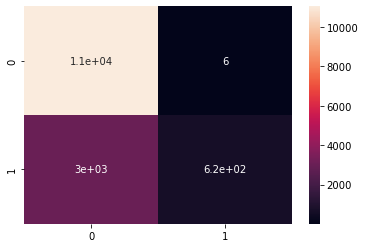

In [147]:
import seaborn as sn
conf_mat = confusion_matrix(y_test,y_predict)
sn.heatmap(conf_mat, annot=True)
plt.show()

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26109
           1       0.99      0.17      0.30      8080

    accuracy                           0.80     34189
   macro avg       0.89      0.59      0.59     34189
weighted avg       0.84      0.80      0.75     34189



In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     11046
           1       0.99      0.17      0.29      3607

    accuracy                           0.80     14653
   macro avg       0.89      0.59      0.59     14653
weighted avg       0.84      0.80      0.74     14653



In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
L1 = []
L2 = []
val_range = [2,5,10,15,20,30,50,100]

for i in val_range:
    dtree = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth= i)
    dtree.fit(X_train,y_train.ravel())
    y_pred = dtree.predict(X_train)
    y_predict = dtree.predict(X_test)
    L1.append(round(accuracy_score(y_train,y_pred),4))
    L2.append(round(accuracy_score(y_test,y_predict),4))
L_val = pd.concat([pd.Series(val_range),pd.Series(L1)], axis=1)
L1_val = pd.concat([pd.Series(val_range),pd.Series(L2)], axis=1)
L_val.columns = ['Depth','Accuracy']
L1_val.columns = ['Depth','Accuracy']
L_val.sort_values(by="Accuracy", ascending=False, inplace = True)
L1_val.sort_values(by="Accuracy", ascending=False, inplace = True)
print(L_val)
print('------------------------')
print(L1_val)

   Depth  Accuracy
6     50    0.9989
7    100    0.9989
5     30    0.9789
4     20    0.8984
3     15    0.8648
2     10    0.8463
1      5    0.8335
0      2    0.8042
------------------------
   Depth  Accuracy
3     15    0.8348
2     10    0.8335
4     20    0.8325
1      5    0.8251
5     30    0.8187
7    100    0.8067
6     50    0.8066
0      2    0.7960


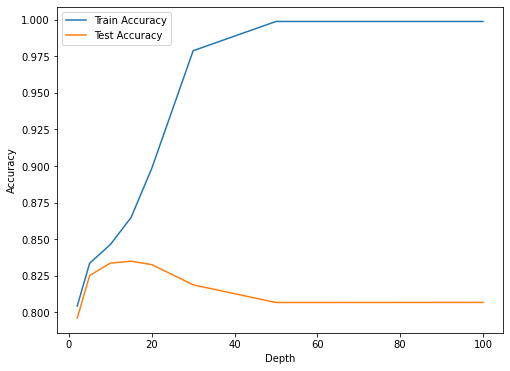

In [158]:

max_depth_list = [2,5,10,15,20,30,50,100]

train = [] # Log training errors for each model
test = [] # Log testing errors for each model

for x in max_depth_list:
    dtree = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth=x)
    dtree.fit(X_train,y_train.ravel())
    pred = dtree.predict(X_train)
    predict = dtree.predict(X_test)
    train.append(accuracy_score(y_train,pred))
    test.append(accuracy_score(y_test,predict))

plt.figure(figsize=(8,6))
plt.plot(max_depth_list, train, label='Train Accuracy') # Plot training error over domain
plt.plot(max_depth_list, test, label='Test Accuracy') # Plot testing error over domain
plt.xlabel('Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

## based on the plot, considering Depth 15 as the best fit for random model

In [159]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth=5)

In [160]:
model.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=0)

In [161]:
y_pred=model.predict(X_train)

In [162]:
y_predict = model.predict(X_test)

In [164]:
from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred))

Train Accuracy: 0.8334844540641727


In [165]:
from sklearn import metrics
print("Test Accuracy:",metrics.accuracy_score(y_test, y_predict))

Test Accuracy: 0.8250870128983826


In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     26109
           1       0.81      0.39      0.52      8080

    accuracy                           0.83     34189
   macro avg       0.82      0.68      0.71     34189
weighted avg       0.83      0.83      0.81     34189



In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     11046
           1       0.81      0.38      0.52      3607

    accuracy                           0.83     14653
   macro avg       0.82      0.67      0.70     14653
weighted avg       0.82      0.83      0.80     14653

